In [250]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pickle
import json

In [4]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df2 = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [9]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [21]:
def bhk_convertor(x):
    return float(x.split(' ')[0])

In [22]:
df3['bhk']= df3['size'].apply(bhk_convertor)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12672\3728897579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(bhk_convertor)


In [23]:
df3['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [28]:
def floatchecker(x):
    try:
        float(x)
    except:
        return False
    return True

In [49]:
strs = df3.loc[~df3['total_sqft'].apply(floatchecker), 'total_sqft'].unique()

In [76]:
def hyphenroemover(x):
    try:
        float(x)
    except: 
        values = x.split('-')
        if len(values) == 2:
            return (float(values[0]) + float(values[1]))/2
        else:
            return None
    return float(x)

In [77]:
df3.shape

(13246, 6)

In [88]:
df3['total_sqft'] = df3['total_sqft'].apply(hyphenroemover)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12672\4199773142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft'] = df3['total_sqft'].apply(hyphenroemover)


In [91]:
df4 = df3.dropna()

In [93]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bhk         13200 non-null  float64
dtypes: float64(4), object(2)
memory usage: 721.9+ KB


In [94]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


In [96]:
df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft']

C:\Users\Hp\AppData\Local\Temp\ipykernel_12672\1891633876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft']


In [98]:
df4.location = df4.location.apply(lambda x: x.strip())

C:\Users\Hp\AppData\Local\Temp\ipykernel_12672\1462615485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.location = df4.location.apply(lambda x: x.strip())


In [105]:
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [115]:
location_stats[location_stats > 10]

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
HAL 2nd Stage                 11
Banjara Layout                11
LB Shastri Nagar              11
Kodigehalli                   11
2nd Phase Judicial Layout     11
Name: count, Length: 240, dtype: int64

In [118]:
location_stats[location_stats > 10].index

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal', 'Marathahalli',
       'Raja Rajeshwari Nagar',
       ...
       'Tindlu', 'Marsur', 'Bommenahalli', 'Narayanapura', 'Nehru Nagar',
       'HAL 2nd Stage', 'Banjara Layout', 'LB Shastri Nagar', 'Kodigehalli',
       '2nd Phase Judicial Layout'],
      dtype='object', name='location', length=240)

In [116]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [117]:
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [120]:
df4['reduced locations'] = df4['location'].apply(lambda x:'other' if x in location_stats_less_than_10.index else x)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12672\4243537706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['reduced locations'] = df4['location'].apply(lambda x:'other' if x in location_stats_less_than_10.index else x)


In [130]:
df4['reduced locations'].value_counts().sort_values(ascending = False)

reduced locations
other                        2872
Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
                             ... 
2nd Phase Judicial Layout      11
Nehru Nagar                    11
Pattandur Agrahara             11
Banjara Layout                 11
Kodigehalli                    11
Name: count, Length: 241, dtype: int64

In [134]:
len(df4['reduced locations'].unique())

241

In [135]:
df4['location'] = df4['reduced locations']

C:\Users\Hp\AppData\Local\Temp\ipykernel_12672\1924338007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['location'] = df4['reduced locations']


In [136]:
len(df4['location'].unique())

241

In [139]:
df5 = df4.drop('reduced locations', axis=1)

In [140]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


In [141]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [142]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [143]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [145]:
def removingoutliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df6.groupby('location'):
        mean = subdf['price_per_sqft'].mean()
        std = subdf['price_per_sqft'].std()
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [146]:
df6.shape

(12456, 7)

In [147]:
df7 = removingoutliers(df6)

In [148]:
df7.shape

(10293, 7)

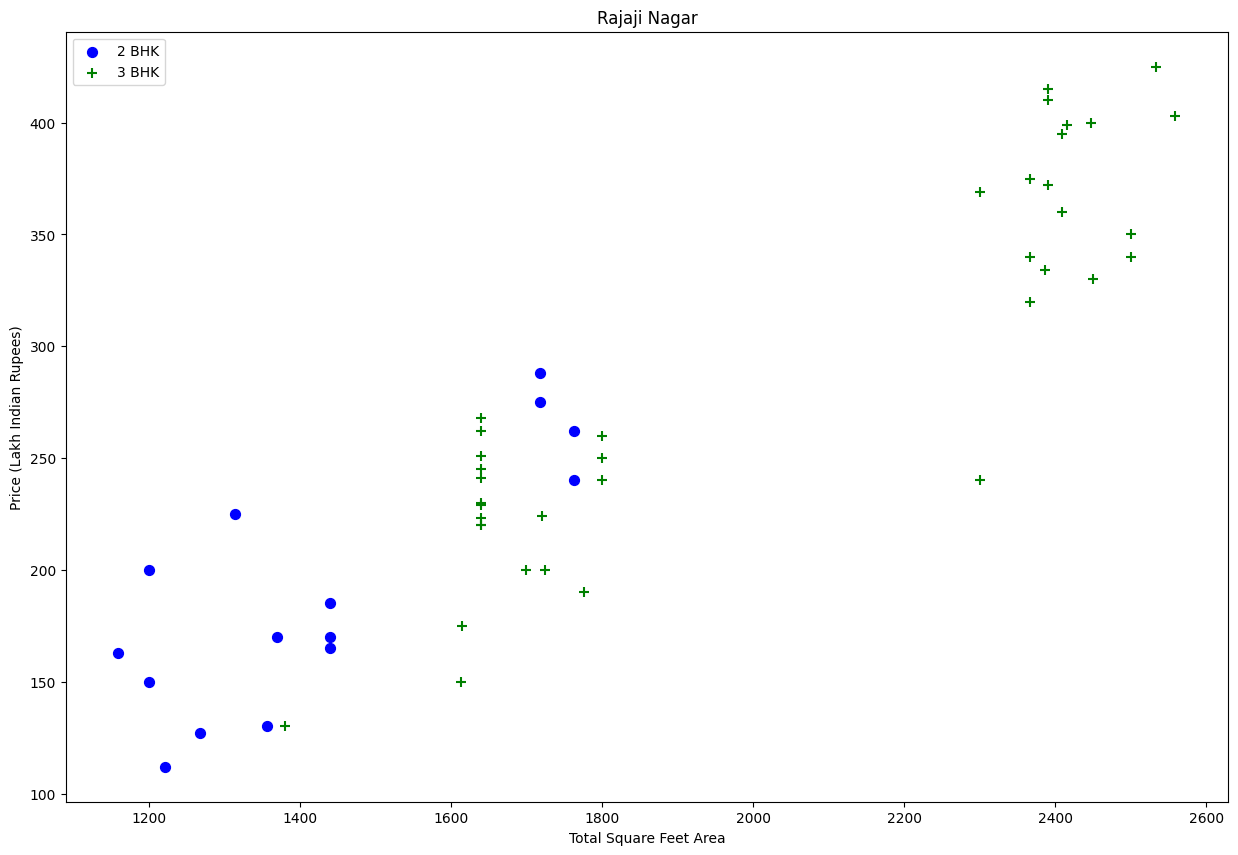

In [152]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

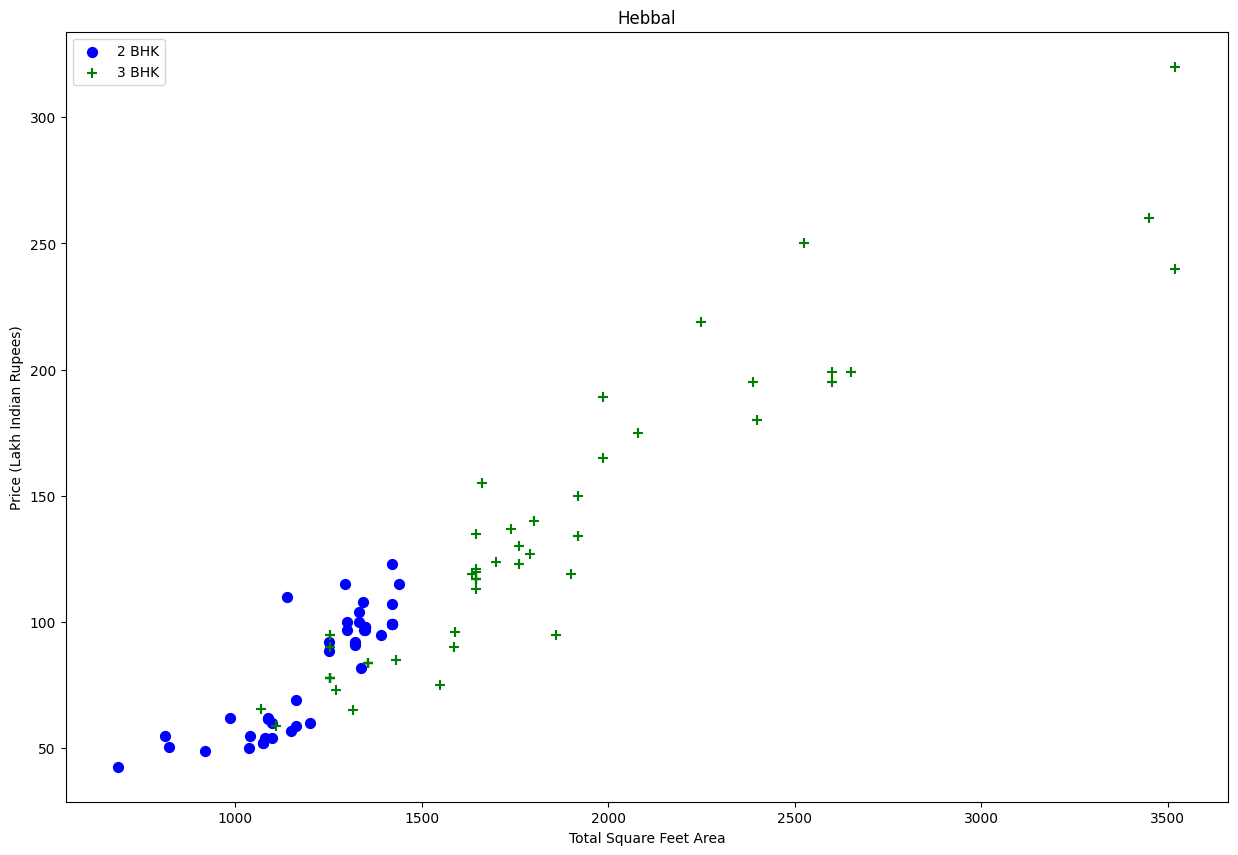

In [153]:
plot_scatter_chart(df7,"Hebbal")

In [154]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(7365, 7)

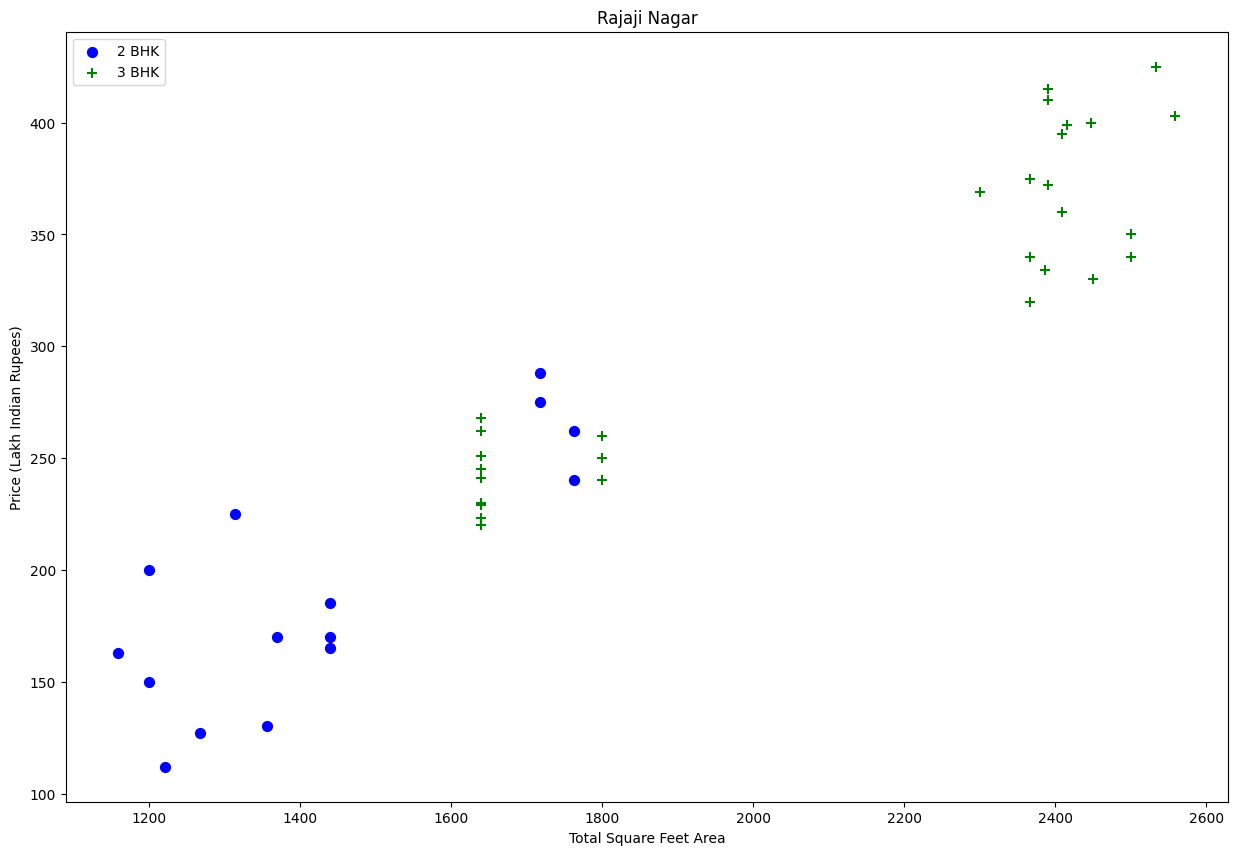

In [155]:
plot_scatter_chart(df8,"Rajaji Nagar")

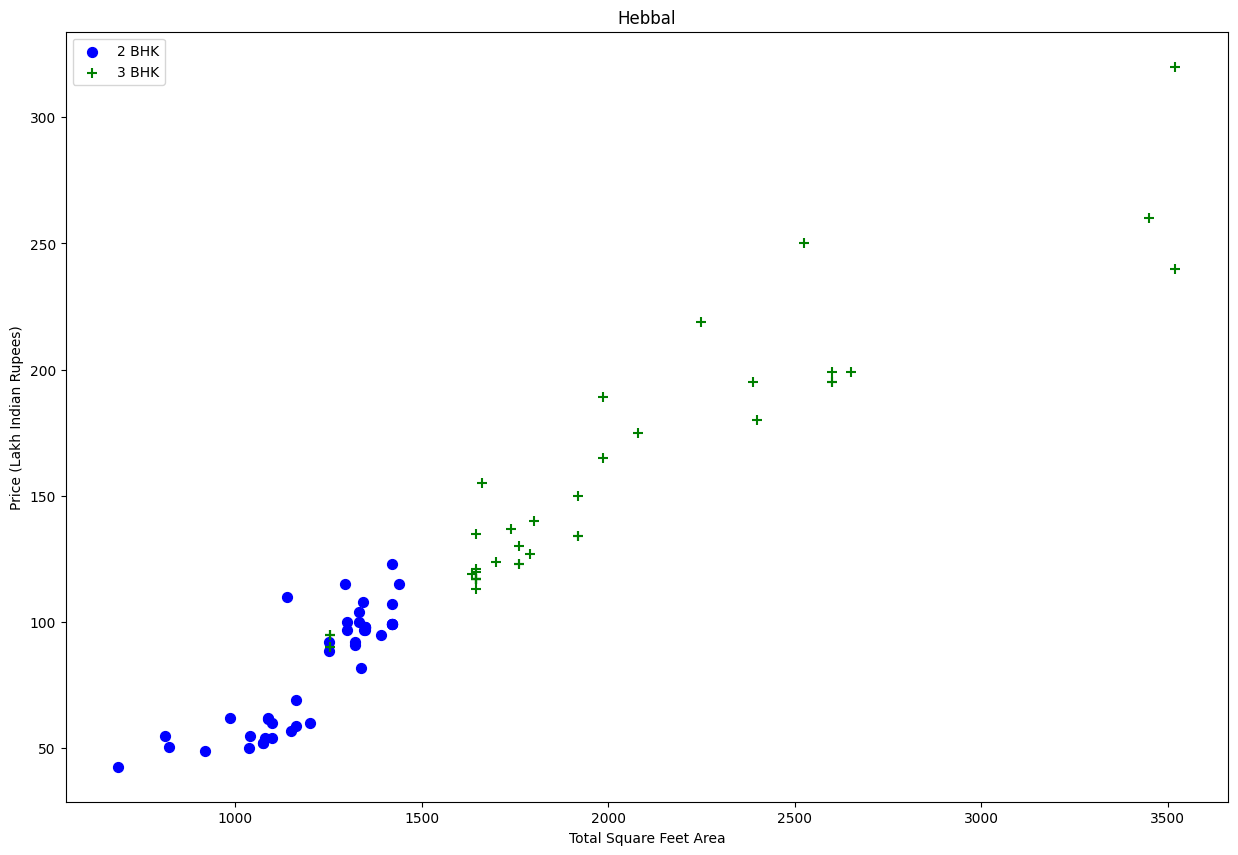

In [157]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

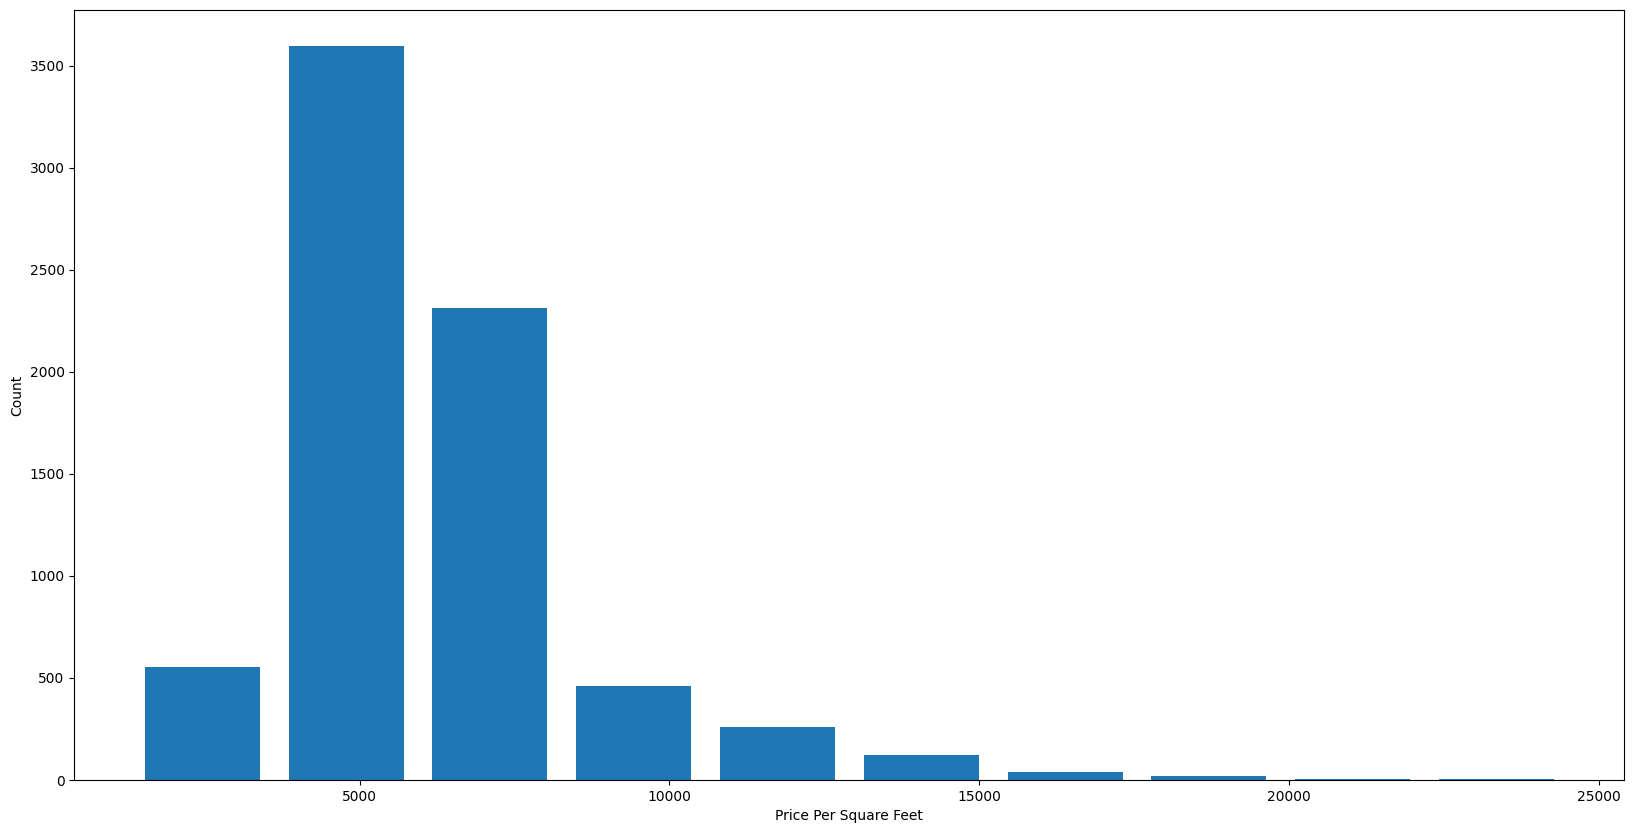

In [158]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [159]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [160]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5273,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6756,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8458,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [161]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7286, 7)

In [162]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491


In [163]:
df10 = df9.drop(['size','price_per_sqft'],axis=1)
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0


In [166]:
df10.to_csv('Cleaned_house_prices.csv', index = False)

In [169]:
dummies = pd.get_dummies(df10['location'], dtype = 'int32')

In [171]:
df11 = pd.concat([df10, dummies], axis = 1)

In [173]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
df12 = df11.drop(['location', 'other'], axis = 1)

# Training Begins

In [176]:
X=df12.drop('price', axis = 1)

In [178]:
y = df12.price

In [185]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

In [186]:
len(X_train)

5828

In [187]:
len(X_test)

1458

In [188]:
model = LinearRegression()

In [189]:
model.fit(X_train, y_train)

LinearRegression()

In [190]:
model.score(X_test, y_test)

0.8414560436684702

In [195]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(LinearRegression(), X, y, cv=cv)

In [198]:
scores.min()

0.7569740938565293

In [205]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False],
                'n_jobs' : [None, 1, 2, 3]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2, 3],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['poisson','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, verbose = 3, error_score='raise')
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ........n_jobs=None, positive=True;, score=0.736 total time=   1.4s
[CV 2/5] END ........n_jobs=None, positive=True;, score=0.823 total time=   1.2s
[CV 3/5] END ........n_jobs=None, positive=True;, score=0.809 total time=   0.8s
[CV 4/5] END ........n_jobs=None, positive=True;, score=0.864 total time=   0.9s
[CV 5/5] END ........n_jobs=None, positive=True;, score=0.834 total time=   1.1s
[CV 1/5] END .......n_jobs=None, positive=False;, score=0.757 total time=   0.4s
[CV 2/5] END .......n_jobs=None, positive=False;, score=0.855 total time=   0.3s
[CV 3/5] END .......n_jobs=None, positive=False;, score=0.850 total time=   0.3s
[CV 4/5] END .......n_jobs=None, positive=False;, score=0.885 total time=   0.3s
[CV 5/5] END .......n_jobs=None, positive=False;, score=0.864 total time=   0.3s
[CV 1/5] END ...........n_jobs=1, positive=True;, score=0.736 total time=   1.1s
[CV 2/5] END ...........n_jobs=1, positive=True;,

,model,best_score,best_params
0,linear_regression,0.842243,"{'n_jobs': None, 'positive': False}"
1,lasso,0.693704,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.733347,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [206]:
model.fit(X_train, y_train)

LinearRegression()

In [207]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(LinearRegression(), X, y, cv=cv)
scores

array([0.75697409, 0.85519688, 0.85024176, 0.88529063, 0.86350956])

In [210]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [213]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


84.7782721592432

In [214]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.29520492388995

In [215]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


190.6144457462912

In [222]:
df10[(df10['location'] == 'Indira Nagar') & (df10['total_sqft'] >= 1000) & (df10['bath']==2) &(df10['bhk']==2) ]

,location,total_sqft,bath,price,bhk
3523,Indira Nagar,1200.0,2.0,93.0,2.0
3524,Indira Nagar,1128.0,2.0,105.0,2.0
3528,Indira Nagar,1210.0,2.0,102.0,2.0
3529,Indira Nagar,1224.0,2.0,105.0,2.0
3532,Indira Nagar,1400.0,2.0,168.0,2.0
3535,Indira Nagar,1145.0,2.0,100.0,2.0
3536,Indira Nagar,1470.0,2.0,170.0,2.0
3541,Indira Nagar,1260.0,2.0,100.0,2.0
3547,Indira Nagar,1475.0,2.0,171.0,2.0
3557,Indira Nagar,1260.0,2.0,120.0,2.0


In [230]:
df10.loc[(df10['location'] == '1st Phase JP Nagar') & (df10['total_sqft'] >= 1000) & (df10['bath']==2) &(df10['bhk']==2),
'price'].mean()

102.5

In [243]:
f = open('house_prediction_model.pickle', 'wb')

In [244]:
pickle.dump(model, f)

In [251]:
columns = {'data_columns': [col.lower() for col in X.columns]}

In [261]:
data = json.dumps(columns)

In [262]:
with open("columns.json", "w") as outfile:
    outfile.write(data)